# Veri Setinin ve Problemin Anlasilmasi

Bu proje ile amac asagidaki degiskenleri kullanarak beyzbol oyuncularinin maasini('Salary') tahmin etmek.

* AtBat : 1986 yılında vuruş sayısı

* Hits : 1986'daki isabet sayısı

* HmRun : 1986 yılında yapılan home run sayısı

* Runs : 1986 yılında yapılan koşu sayısı

* RBI : 1986 yılında vuruş yapılan koşu sayısı (RBI = Bir vurucunun vuruş yaptığında kaç tane oyuncuya run yaptırdığı)  #rbi, run dan daha önemli

* Walks : 1986 yılında yürüyüş sayısı

* Years : Büyük liglerdeki yıl sayısı

* CAtBat : Kariyeri boyunca vuruş sayısı

* CHits : Kariyeri boyunca isabet sayısı

* CHmRun : Kariyeri boyunca home run sayısı

* CRuns : Kariyeri boyunca koşu sayısı

* CRBI : Kariyeri boyunca vuruş yapılan koşu sayısı

* CWalks : Kariyeri boyunca yürüyüş sayısı

* League : Oyuncunun ligini gösteren "A" ve "N"  seviyelerine sahip bir faktör

* Division : 1986 sonunda oyuncunun bölünmesini gösteren "E" ve "W" seviyelerine sahip bir faktör

* PutOuts : 1986 yılında yapılan itiraz sayısı

* Assists : 1986 yılında asist sayısı

* Errors : 1986'daki hata sayısı (topu yanlış yere atma, topu elinden kaçırma..)

* **Salary :** 1987 açılış gününde yıllık binlerce dolar maaş ---> **(Target)** 

* NewLeague :  1987'nin başında seviyeleri A ve N oyuncunun ligini gösteren bir faktör

Proje asagidaki bolumler cercevesinde ele alinacaktir. 

# Table Of Contents :

### 1.Importing Libraries - Reading Data


### 2.Data Preprocessing - Exploratory Data Analysis (EDA)
    
    2.1 Missing Values
    
    2.2 Outliers
    
    2.3 Exploring Numeric Features
    
    2.4 Exploring Categoric Features
    
### 3.Feature Engineering
    
    3.1 Binning Continuous Features
    
    3.2 Creating New Features
    
    3.3 Feature Transformation (Categoric Variables)
    
    3.4 Feature Scaling(Continuous Variables)
    
    3.5 Feature Selecting
  
### 4.Model Training (Base Models)
    
    4.1 Lineer Regression
    
    4.2 Ridge Regression
    
    4.3 Lasso Regression
    
    4.4 ElasticNet Regression
    
    4.5 KNN
    
    4.6 SVR
    
    4.7 Neural Network - MLP
    
    4.8 CART - Decision Tree
    
    4.9 Random Forests 
    
    4.10 GBM 
    
    4.11 XGBoost 
    
    4.12 LightGBM 
    
    4.13 CatBoost
    
    

### 5.Model Tuning
    
    5.1 Lineer Regression Tuning
    
    5.2 Ridge Regression Tuning
    
    5.3 Lasso Regression Tuning
    
    5.4 ElasticNet Regression Tuning
    
    5.5 KNN Tuning
    
    5.6 SVR Tuning
    
    5.7 Neural Network - MLP Tuning 
    
    5.8 CART - Decision Tree Tuning
    
    5.9 Random Forests Tuning
    
    5.10 GBM Tuning
    
    5.11 XGBoost Tuning
    
    5.12 LightGBM Tuning
    
    5.13 CatBoost Tuning
    
    
### 6. Model Selecting



# 1. Importing Libraries - Reading Data

In [1]:
# Kutuphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Veri setinin okunmasi
df = pd.read_csv('Hitters.csv')

# 2. Data Preprocessing -  Exploratory Data Analysis (EDA)

In [3]:
df.shape

(322, 20)

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [6]:
df.sort_values('Salary',ascending=False)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
100,495,151,17,61,84,78,10,5624,1679,275,884,1015,709,A,E,1045,88,13,2460.000,A
163,618,200,20,98,110,62,13,7127,2163,351,1104,1289,564,A,E,330,16,8,2412.500,A
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
82,677,238,31,117,113,53,5,2223,737,93,349,401,171,A,E,1377,100,6,1975.000,A
229,514,144,0,67,54,79,9,4739,1169,13,583,374,528,N,E,229,453,15,1940.000,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,289,63,7,36,41,44,17,7402,1954,195,1115,919,1153,A,W,166,211,7,NaN,A
298,181,46,1,19,18,17,5,937,238,9,88,95,104,A,E,37,98,9,NaN,A
302,200,51,2,14,29,25,23,9778,2732,379,1272,1652,925,N,W,398,29,7,NaN,N
305,580,194,9,91,62,78,8,3372,1028,48,604,314,469,N,E,270,13,6,NaN,N


### 2.1 Missing Values

In [7]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [8]:
# 1.way : dropping missing values

# df= df.dropna()

In [9]:
df['Experience'] = pd.cut(df['Years'],4)

pd.cut(df['Years'],4).value_counts()

(0.977, 6.75]    172
(6.75, 12.5]      90
(12.5, 18.25]     55
(18.25, 24.0]      5
Name: Years, dtype: int64

In [10]:
# 2.way : Filling with an average salary according to categorical variable classes
df['Experience'] = pd.cut(df['Years'],[0,5,10,15,25],labels=[1,2,3,4])
df.groupby(['League','Division', 'Experience']).agg({'Salary':'mean'})

Salary
League Division Experience            
A      E        1           427.159091
                2           787.252400
                3           816.311353
                4           665.416750
       W        1           223.935897
                2           609.479188
                3           835.250000
                4           480.416667
N      E        1           325.930097
                2           812.394684
                3           894.322667
                4           662.500000
       W        1           287.354167
                2           539.393955
                3           721.894000
                4           665.555500

In [11]:
df['Salary'] = df['Salary'].fillna(df.groupby(['League','Division', 'Experience'])['Salary'].transform('mean'))

### 2.2 Outliers

In [12]:
df.describe([0.01, 0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
AtBat,322.0,380.928571,153.404981,16.0,20.42,161.00,194.1,255.250000,379.50,512.00,584.9,609.90,658.59,687.0
Hits,322.0,101.024845,46.454741,1.0,4.42,39.00,45.1,64.000000,96.00,137.00,163.0,174.00,210.79,238.0
HmRun,322.0,10.770186,8.709037,0.0,0.00,0.00,1.0,4.000000,8.00,16.00,24.0,28.95,33.00,40.0
Runs,322.0,50.909938,26.024095,0.0,1.21,17.00,20.1,30.250000,48.00,69.00,89.0,94.00,107.79,130.0
RBI,322.0,48.027950,26.166895,0.0,2.00,14.00,19.0,28.000000,44.00,64.75,86.0,96.00,112.37,121.0
Walks,322.0,38.742236,21.639327,0.0,1.00,11.05,15.0,22.000000,35.00,53.00,69.9,78.00,93.58,105.0
Years,322.0,7.444099,4.926087,1.0,1.00,1.00,2.0,4.000000,6.00,11.00,15.0,17.00,19.79,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,41.00,216.50,342.2,816.750000,1928.00,3924.25,6123.4,7125.60,8749.97,14053.0
CHits,322.0,717.571429,654.472627,4.0,9.84,54.00,86.0,209.000000,508.00,1059.25,1659.6,2017.15,2500.34,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,0.00,2.00,4.0,14.000000,37.50,90.00,194.9,265.65,373.12,548.0


In [13]:
df.shape

(322, 21)

In [14]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Experience
0,293,66,1,30,29,14,1,293,66,1,...,29,14,A,E,446,33,20,427.159091,A,1
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.000000,N,3
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.000000,A,1
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.000000,N,3
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.500000,N,1


In [15]:
num_features = df.select_dtypes(['int64']).columns

for feature in num_features:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    IQR = Q3-Q1
    
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    
    # Visualization of outliers
    
    #sns.boxplot(x = df[feature])
    #plt.show()

    
    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature," : " + str(df[(df[feature] > upper) | (df[feature] < lower)].shape[0]))
    else:
        print(feature, " : 0")
        
    #Filling outliers with upper or lower limit :
    
    #df[df[feature] < upper][feature] = upper
    ##df[df[feature] > lower][feature] = lower
    
    #Dropping outliers : 
    
    #df = df[df[feature]<upper]

AtBat  : 0
Hits  : 0
HmRun  : 2
Runs  : 1
RBI  : 1
Walks  : 1
Years  : 2
CAtBat  : 5
CHits  : 6
CHmRun  : 32
CRuns  : 5
CRBI  : 26
CWalks  : 20
PutOuts  : 36
Assists  : 23
Errors  : 9


In [16]:
df.shape

(322, 21)

In [17]:
# 2.way: LOF - Local Outlier Factor 
from sklearn.neighbors import LocalOutlierFactor

clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(df[num_features])
df_scores=clf.negative_outlier_factor_
df_scores= np.sort(df_scores)
df_scores[0:20]

array([-5.36163264, -2.54779913, -2.54761824, -2.12995308, -2.09374778,
       -2.06309509, -2.03049509, -1.99594485, -1.9876426 , -1.7249404 ,
       -1.63524555, -1.63503538, -1.50421313, -1.49637253, -1.49025551,
       -1.47753864, -1.46874436, -1.45248229, -1.44004493, -1.43654432])

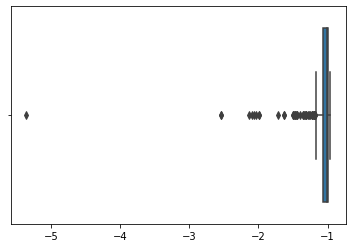

In [18]:
sns.boxplot(df_scores);

In [19]:
threshold=np.sort(df_scores)[7]
print(threshold)
df = df.loc[df_scores > threshold]
df = df.reset_index(drop=True)

-1.9959448520295393


In [20]:
df.shape

(314, 21)

### 2.3 Exploring Numeric Features

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AtBat       314 non-null    int64   
 1   Hits        314 non-null    int64   
 2   HmRun       314 non-null    int64   
 3   Runs        314 non-null    int64   
 4   RBI         314 non-null    int64   
 5   Walks       314 non-null    int64   
 6   Years       314 non-null    int64   
 7   CAtBat      314 non-null    int64   
 8   CHits       314 non-null    int64   
 9   CHmRun      314 non-null    int64   
 10  CRuns       314 non-null    int64   
 11  CRBI        314 non-null    int64   
 12  CWalks      314 non-null    int64   
 13  League      314 non-null    object  
 14  Division    314 non-null    object  
 15  PutOuts     314 non-null    int64   
 16  Assists     314 non-null    int64   
 17  Errors      314 non-null    int64   
 18  Salary      314 non-null    float64 
 19  NewLeagu

In [22]:
cat_features = ['League','Division','NewLeague'] 
num_features = list(df.select_dtypes(['int64']).columns)

In [23]:
cat_features

['League', 'Division', 'NewLeague']

In [24]:
corr = df.corr()

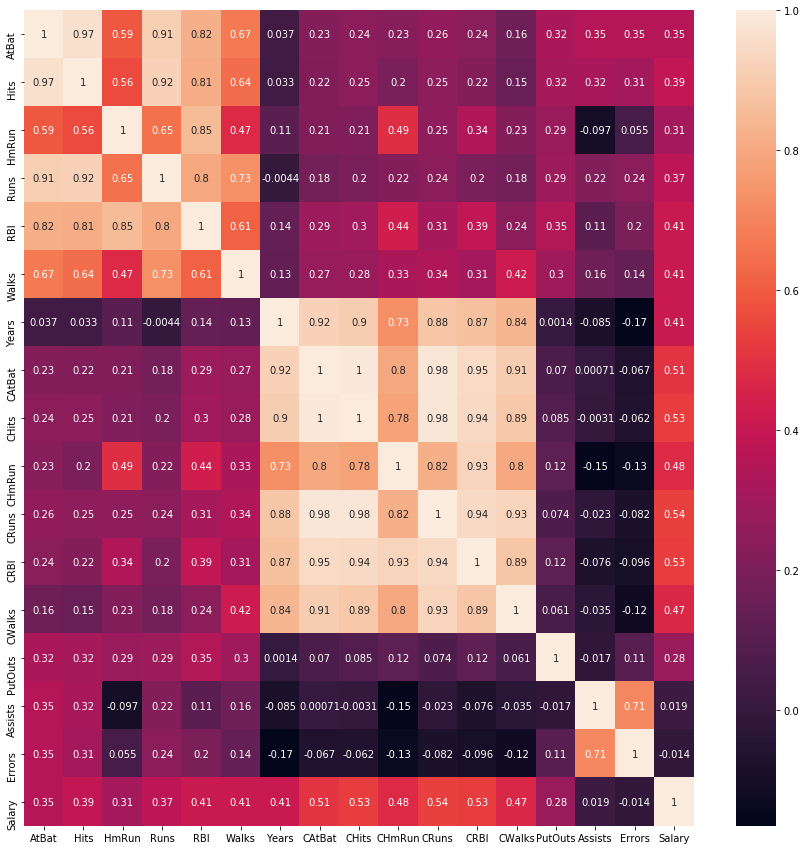

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

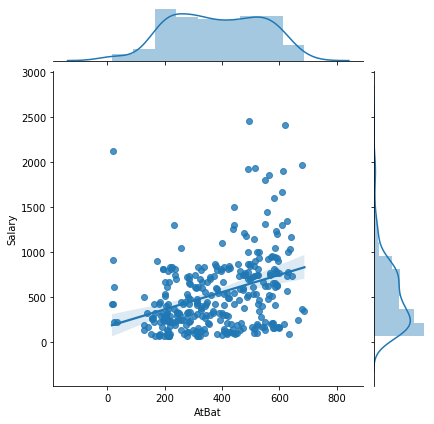

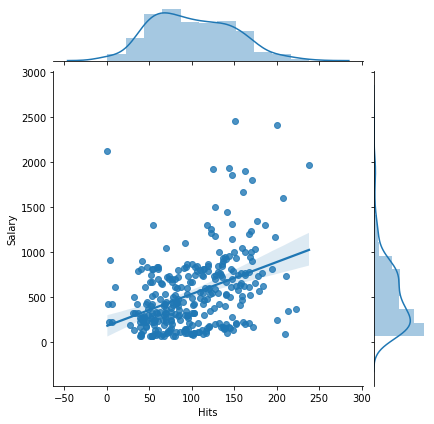

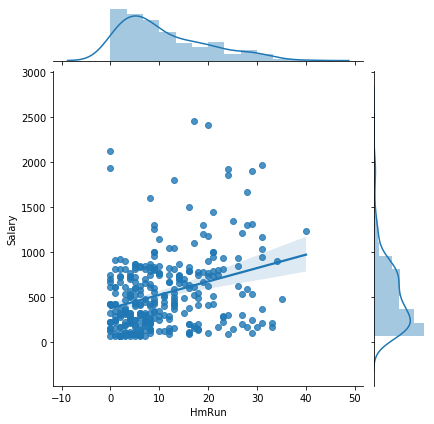

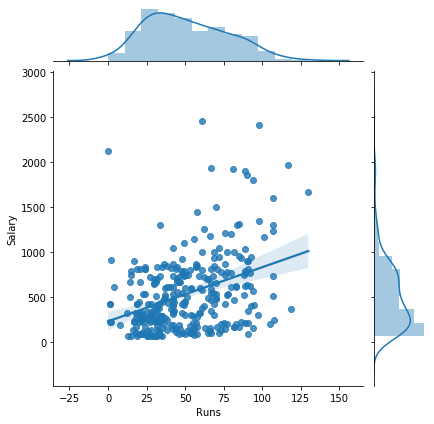

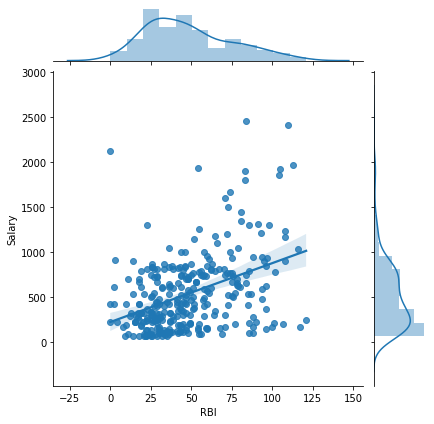

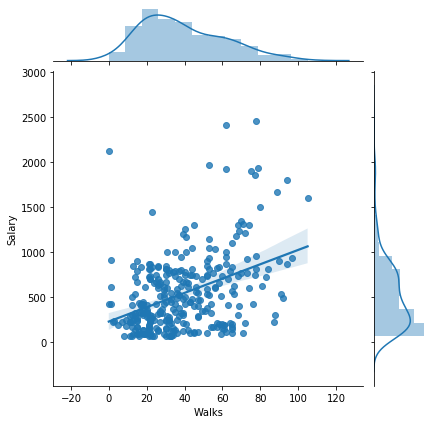

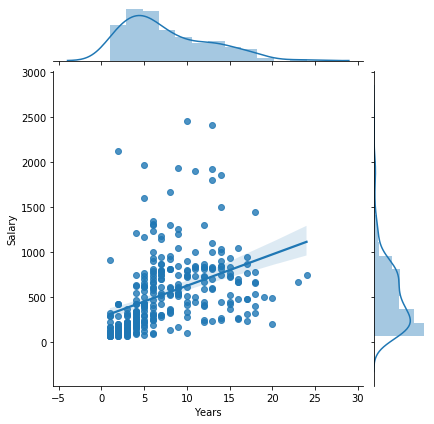

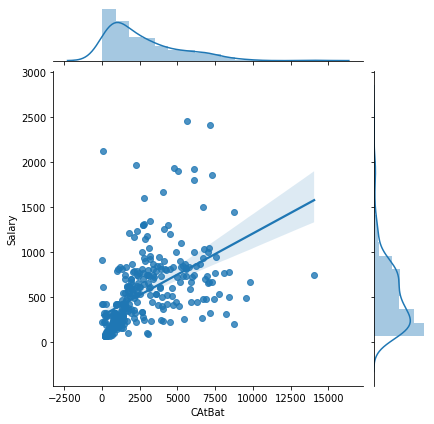

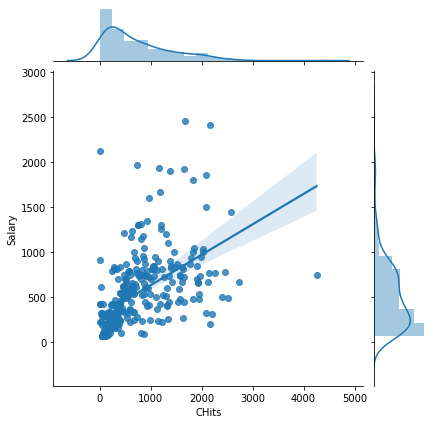

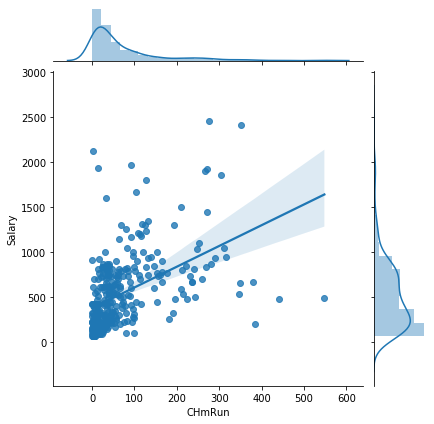

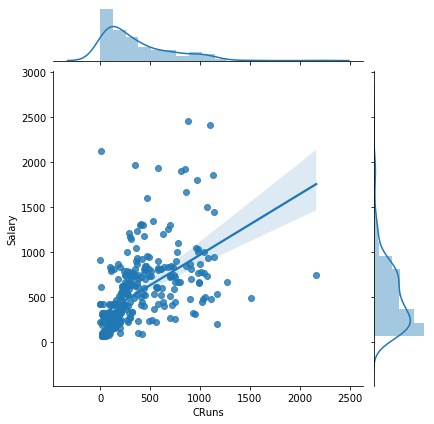

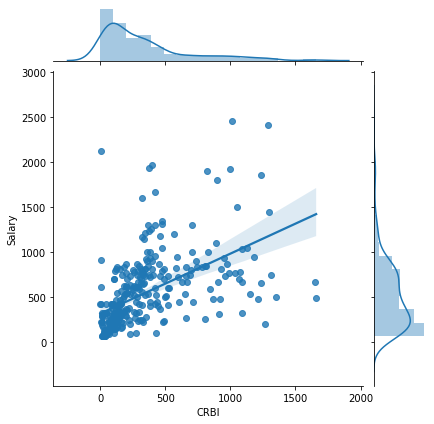

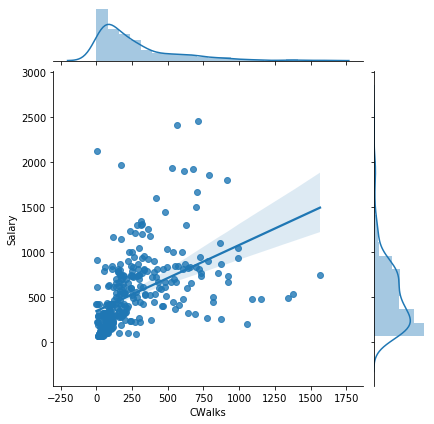

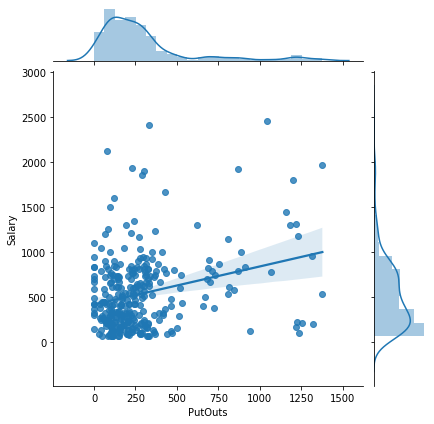

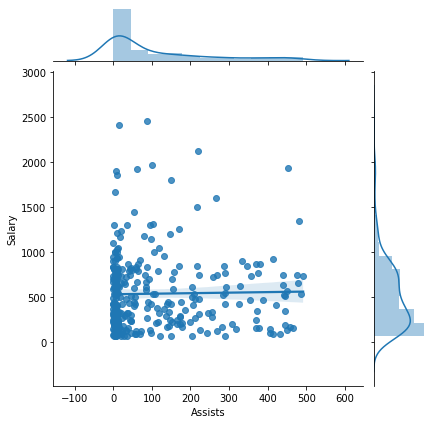

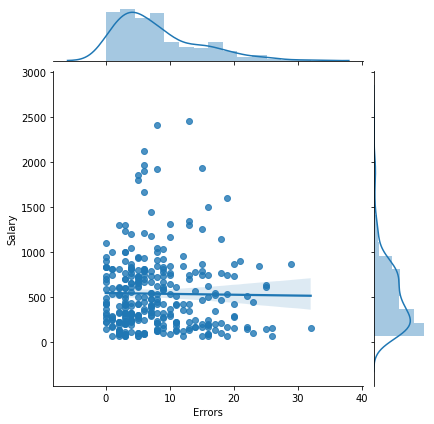

In [26]:
for col in num_features:
    #sns.scatterplot(x=col ,y='Salary',data=df,hue='League')
    sns.jointplot(x =col, y = 'Salary', data = df, kind = "reg")
    plt.show()

Errors, Assist, Years --> maas ile dogrusal olarak iliskili gorunmuyor.

### 2.4 Exploring Categoric Features

In [27]:
df.groupby('League').mean().T

League,A,N
AtBat,394.713450,364.909091
Hits,105.222222,96.174825
HmRun,12.333333,9.076923
Runs,54.631579,46.895105
RBI,51.690058,43.944056
Walks,39.795322,37.839161
Years,7.730994,7.188811
CAtBat,2733.228070,2580.230769
CHits,739.847953,700.888112
CHmRun,78.578947,59.783217


In [28]:
df.groupby('Division').mean().T

Division,E,W
AtBat,389.745098,372.962733
Hits,104.973856,97.422360
HmRun,11.000000,10.708075
Runs,53.300654,49.024845
RBI,50.333333,46.099379
Walks,40.431373,37.453416
Years,7.424837,7.540373
CAtBat,2619.183007,2705.714286
CHits,715.333333,728.540373
CHmRun,69.130719,70.863354


In [29]:
df.groupby('NewLeague').mean().T

NewLeague,A,N
AtBat,389.532164,371.104895
Hits,103.836257,97.832168
HmRun,12.298246,9.118881
Runs,53.941520,47.720280
RBI,51.298246,44.412587
Walks,39.385965,38.328671
Years,7.742690,7.174825
CAtBat,2720.812865,2595.076923
CHits,734.146199,707.706294
CHmRun,78.900585,59.398601


Exploring LEAGUE feature
A    0.544586
N    0.455414
Name: League, dtype: float64


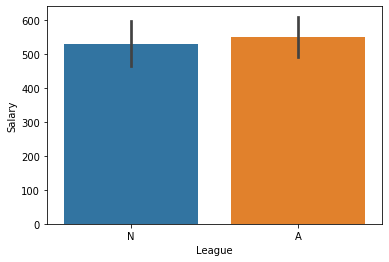

Exploring DIVISION feature
W    0.512739
E    0.487261
Name: Division, dtype: float64


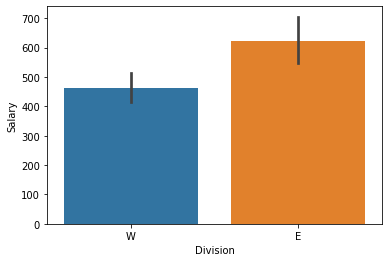

Exploring NEWLEAGUE feature
A    0.544586
N    0.455414
Name: NewLeague, dtype: float64


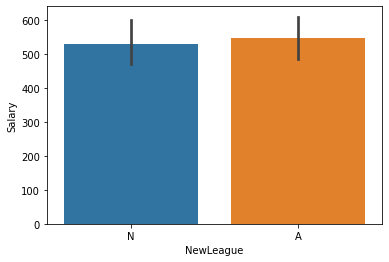

In [30]:
for col in cat_features:
    print('Exploring {} feature'.format(col.upper()))
    print(df[col].value_counts(normalize=True,ascending=False))
    sns.barplot(x=col, y="Salary", data=df)
    plt.show()

In [31]:
#sns.boxplot("NewLeague", "CWalks", data = df)

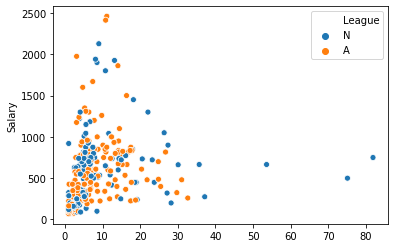

In [32]:
sns.scatterplot(x=df['CHits']/df['Hits'] ,y='Salary',data=df,hue='League')
plt.show()

# 3. Feature Engineering

### 3.1  Binning Continuous Features

In [33]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Experience
0,323,81,6,26,32,8,2,341,86,6,...,34,8,N,W,143,290,19,75.000,N,1
1,401,92,17,49,66,65,13,5206,1332,253,...,890,866,A,E,0,0,0,1100.000,A,3
2,574,159,21,107,75,59,10,4631,1300,90,...,504,488,A,E,238,445,22,517.143,A,2
3,202,53,4,31,26,27,9,1876,467,15,...,186,161,N,W,304,45,11,512.500,N,2
4,418,113,13,48,61,47,4,1512,392,41,...,204,203,N,E,211,11,7,550.000,N,1


In [34]:
?pd.qcut

#### Years

In [35]:
df['Experience'] = pd.cut(df['Years'],[0,5,10,15,25],labels=[1,2,3,4])

In [36]:
df['Experience'].value_counts()

1    137
2     96
3     55
4     26
Name: Experience, dtype: int64

In [37]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Experience
0,323,81,6,26,32,8,2,341,86,6,...,34,8,N,W,143,290,19,75.000,N,1
1,401,92,17,49,66,65,13,5206,1332,253,...,890,866,A,E,0,0,0,1100.000,A,3
2,574,159,21,107,75,59,10,4631,1300,90,...,504,488,A,E,238,445,22,517.143,A,2
3,202,53,4,31,26,27,9,1876,467,15,...,186,161,N,W,304,45,11,512.500,N,2
4,418,113,13,48,61,47,4,1512,392,41,...,204,203,N,E,211,11,7,550.000,N,1


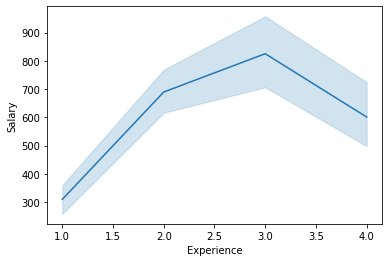

In [38]:
sns.lineplot(x='Experience', y="Salary", data=df, estimator=np.mean)

In [40]:
cat_features.extend(['Experience'])

### 3.2 Creating New Features

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AtBat       314 non-null    int64   
 1   Hits        314 non-null    int64   
 2   HmRun       314 non-null    int64   
 3   Runs        314 non-null    int64   
 4   RBI         314 non-null    int64   
 5   Walks       314 non-null    int64   
 6   Years       314 non-null    int64   
 7   CAtBat      314 non-null    int64   
 8   CHits       314 non-null    int64   
 9   CHmRun      314 non-null    int64   
 10  CRuns       314 non-null    int64   
 11  CRBI        314 non-null    int64   
 12  CWalks      314 non-null    int64   
 13  League      314 non-null    object  
 14  Division    314 non-null    object  
 15  PutOuts     314 non-null    int64   
 16  Assists     314 non-null    int64   
 17  Errors      314 non-null    int64   
 18  Salary      314 non-null    float64 
 19  NewLeagu

In [43]:
df['New_HitRate']=df["CAtBat"]/df["CHits"]

In [44]:
df['New_AtBat']=df["CAtBat"]/df["AtBat"]
df['New_RBI']=df["CRBI"]/df["RBI"]
df['New_Walks']=df["CWalks"]/df["Walks"]
df['New_Hits']=df["CHits"]/df["Hits"]
df['New_HmRun']=df["CHmRun"]/df["HmRun"]
df['New_Runs']=df["CRuns"]/df["Runs"]

In [45]:
df['New_ChmrunRate']=df["CHmRun"]/df["CHits"]

In [46]:
num_features.extend(['New_HitRate','New_RBI','New_Walks','New_Hits','New_HmRun','New_Runs','New_ChmrunRate'])

### 3.3 Feature Transformation (Categoric Variables)

In [47]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [48]:
#LabelEncoding

#le = LabelEncoder()
#df['...'] = le.fit_transform(df['...'])

In [49]:
#OHE 
df = pd.get_dummies(df, columns = cat_features, drop_first = True)

In [50]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,New_ChmrunRate,League_N,Division_W,NewLeague_N,Experience_2,Experience_3,Experience_4,CRBI_bins_2,CRBI_bins_3,CRBI_bins_4
0,323,81,6,26,32,8,2,341,86,6,...,0.069767,1,1,1,0,0,0,0,0,0
1,401,92,17,49,66,65,13,5206,1332,253,...,0.189940,0,0,0,0,1,0,0,1,0
2,574,159,21,107,75,59,10,4631,1300,90,...,0.069231,0,0,0,1,0,0,1,0,0
3,202,53,4,31,26,27,9,1876,467,15,...,0.032120,1,1,1,1,0,0,0,0,0
4,418,113,13,48,61,47,4,1512,392,41,...,0.104592,1,0,1,0,0,0,0,0,0



### 3.4 Feature Scaling(Continuous Variables)

In [51]:
# features = df.columns.drop('Salary')
# target = ['Salary']

In [52]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

df[num_features] = std_scaler.fit_transform(df[num_features])

In [54]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,New_ChmrunRate,League_N,Division_W,NewLeague_N,Experience_2,Experience_3,Experience_4,CRBI_bins_2,CRBI_bins_3,CRBI_bins_4
0,-0.457379,-0.509298,-0.639742,-1.043305,-0.700123,-1.491517,-1.157423,-1.052978,-1.030794,-0.769074,...,-0.470405,1,1,1,0,0,0,0,0,0
1,0.071610,-0.265257,0.646435,-0.139116,0.627297,1.190077,1.125972,1.126904,0.964163,2.059064,...,1.499746,0,0,0,0,1,0,0,1,0
2,1.244878,1.221181,1.114136,2.141011,0.978673,0.907804,0.503228,0.869262,0.912928,0.192722,...,-0.479204,0,0,0,1,0,0,1,0,0
3,-1.277988,-1.130496,-0.873593,-0.846742,-0.934373,-0.597652,0.295646,-0.365184,-0.420779,-0.666025,...,-1.087613,1,1,1,1,0,0,0,0,0
4,0.186902,0.200642,0.178734,-0.178429,0.432089,0.343258,-0.742261,-0.528283,-0.540861,-0.368326,...,0.100518,1,0,1,0,0,0,0,0,0


### 3.5 Feature Selecting

In [55]:
y = df["Salary"]
X = df.drop('Salary', axis=1)

In [56]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=46)

In [57]:
from sklearn.feature_selection import RFECV #Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
from sklearn.ensemble import RandomForestRegressor

def select_features(X,y):
    # numerik olmayan degiskenlerin silinmesi
    X = X.select_dtypes([np.number]).dropna(axis=1)
    
    clf = RandomForestRegressor(random_state=46)
    clf.fit(X, y)
    
    selector = RFECV(clf,cv=10)
    selector.fit(X, y)
    
    features = pd.DataFrame()
    features['Feature'] = X.columns
    features['Importance'] = clf.feature_importances_
    features.sort_values(by=['Importance'], ascending=False, inplace=True)
    features.set_index('Feature', inplace=True)
    features.plot(kind='bar', figsize=(12, 5))
    
    
    best_columns = list(X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns

Best Columns 
------------
['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'New_HitRate', 'New_RBI', 'New_HmRun', 'New_ChmrunRate']



['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'New_HitRate',
 'New_RBI',
 'New_HmRun',
 'New_ChmrunRate']

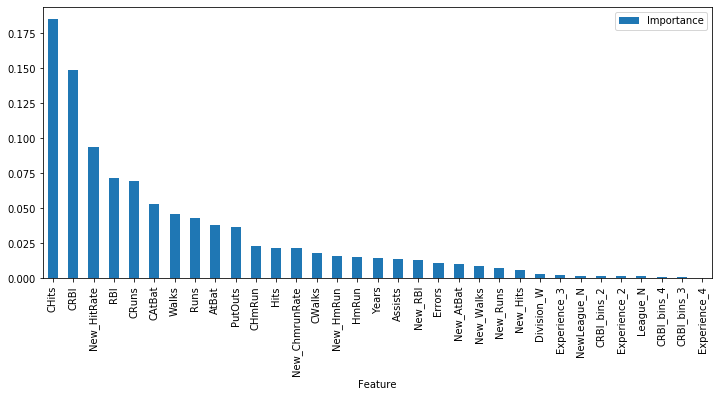

In [58]:
best_features = select_features(X,y)
best_features

In [59]:
# X = X[best_features]
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,New_ChmrunRate,League_N,Division_W,NewLeague_N,Experience_2,Experience_3,Experience_4,CRBI_bins_2,CRBI_bins_3,CRBI_bins_4
0,-0.457379,-0.509298,-0.639742,-1.043305,-0.700123,-1.491517,-1.157423,-1.052978,-1.030794,-0.769074,...,-0.470405,1,1,1,0,0,0,0,0,0
1,0.071610,-0.265257,0.646435,-0.139116,0.627297,1.190077,1.125972,1.126904,0.964163,2.059064,...,1.499746,0,0,0,0,1,0,0,1,0
2,1.244878,1.221181,1.114136,2.141011,0.978673,0.907804,0.503228,0.869262,0.912928,0.192722,...,-0.479204,0,0,0,1,0,0,1,0,0
3,-1.277988,-1.130496,-0.873593,-0.846742,-0.934373,-0.597652,0.295646,-0.365184,-0.420779,-0.666025,...,-1.087613,1,1,1,1,0,0,0,0,0
4,0.186902,0.200642,0.178734,-0.178429,0.432089,0.343258,-0.742261,-0.528283,-0.540861,-0.368326,...,0.100518,1,0,1,0,0,0,0,0,0


# 4. Model Training (Base Models)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=46)

## Lineer Models

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

### 4.1 Lineer Regression

In [62]:
lr_model = LinearRegression()
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [64]:
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lr_rmse

259.00726202836336

In [65]:
lr_cv_rmse =  np.sqrt(np.mean(-cross_val_score(lr_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
lr_cv_rmse

303.07457181414827

In [66]:
np.sqrt(-cross_val_score(lr_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([360.33863149, 327.94038361, 338.56907193, 233.1697035 ,
       260.4279057 , 424.57833272, 322.59832861, 181.59307406,
       254.01274538, 249.99670696])

In [67]:
coefs = pd.DataFrame(lr_model.coef_, index = X_train.columns)
coefs

,0
AtBat,41.594122
Hits,-112.777434
HmRun,-39.588380
Runs,119.561713
RBI,-23.523192
Walks,-36.571741
Years,-64.101372
CAtBat,-1405.494818
CHits,1456.652782
CHmRun,38.850037


In [68]:
intercept = lr_model.intercept_
intercept

608.9322014956306

### 4.2 Ridge Regression

In [69]:
ridge_model = Ridge()
ridge_model

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [70]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [71]:
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_rmse

262.15583296546987

In [72]:
ridge_cv_rmse =  np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
ridge_cv_rmse

286.8651885826089

In [73]:
np.sqrt(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([294.813996  , 335.60597321, 321.57893261, 236.35546761,
       243.29826504, 362.43440766, 332.17395419, 187.70374449,
       246.64067183, 259.10651783])

In [74]:
pd.Series(ridge_model.coef_, index = X_train.columns)

AtBat             -67.011141
Hits               30.920086
HmRun             -10.511636
Runs               71.248446
RBI               -30.610508
Walks              -2.472134
Years             -84.162905
CAtBat           -250.922366
CHits             257.412576
CHmRun            -39.802912
CRuns             104.841797
CRBI              352.777896
CWalks            -11.697450
PutOuts            71.238720
Assists            -0.123256
Errors             -2.474085
New_HitRate       -18.348555
New_AtBat         -11.312531
New_RBI            20.144190
New_Walks          68.860007
New_Hits           23.804357
New_HmRun           4.962636
New_Runs          -83.946315
New_ChmrunRate     14.585027
League_N           42.182562
Division_W        -89.877418
NewLeague_N       -55.754251
Experience_2      247.058285
Experience_3      203.806444
Experience_4     -358.127386
CRBI_bins_2      -123.631931
CRBI_bins_3       -61.253440
CRBI_bins_4       -69.135455
dtype: float64

### 4.3 Lasso Regression

In [75]:
lasso_model = Lasso()
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
lasso_model.fit(X_train,y_train)
y_pred = lasso_model.predict(X_test)

In [77]:
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_rmse

264.8043064145952

In [78]:
lasso_cv_rmse =  np.sqrt(np.mean(-cross_val_score(lasso_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
lasso_cv_rmse 

286.576447163227

In [79]:
np.sqrt(-cross_val_score(lasso_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([285.03179931, 331.07322499, 311.81750143, 233.35407056,
       241.01783575, 391.4374078 , 329.95905827, 182.10202593,
       244.59386277, 256.02849502])

In [80]:
pd.Series(lasso_model.coef_, index = X_train.columns)

AtBat             -33.804163
Hits                0.000000
HmRun              -5.334758
Runs               71.048922
RBI               -36.370032
Walks              -0.325649
Years             -54.187634
CAtBat           -297.044334
CHits             377.992897
CHmRun             -0.565089
CRuns              27.506890
CRBI              286.408305
CWalks              0.000000
PutOuts            71.308234
Assists            -0.000000
Errors             -2.959212
New_HitRate       -19.932848
New_AtBat          -7.657378
New_RBI             9.418864
New_Walks          66.224079
New_Hits           -0.000000
New_HmRun          -0.000000
New_Runs          -64.388266
New_ChmrunRate      9.294766
League_N           23.145502
Division_W        -87.617240
NewLeague_N       -39.556258
Experience_2      224.046037
Experience_3      143.714897
Experience_4     -469.915188
CRBI_bins_2      -100.330625
CRBI_bins_3        -0.000000
CRBI_bins_4        -0.000000
dtype: float64

### 4.4  ElasticNet Regression 

In [81]:
elasticnet_model = ElasticNet()
elasticnet_model

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
elasticnet_model.fit(X_train, y_train)
y_pred = elasticnet_model.predict(X_test)

In [83]:
elasticnet_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
elasticnet_rmse

268.9960806309147

In [84]:
elasticnet_cv_rmse =  np.sqrt(np.mean(-cross_val_score(elasticnet_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
elasticnet_cv_rmse 

295.02101845893264

In [85]:
np.sqrt(-cross_val_score(elasticnet_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([247.09694944, 370.18609979, 278.15451689, 250.08701875,
       216.46672833, 342.82522695, 370.07740775, 236.49993207,
       242.26596802, 341.16949549])

In [86]:
pd.Series(elasticnet_model.coef_, index = X_train.columns)

AtBat              1.578512
Hits              19.860151
HmRun              0.000000
Runs              21.040012
RBI               15.466353
Walks             17.783318
Years             19.408586
CAtBat            31.135256
CHits             44.156601
CHmRun            26.064927
CRuns             42.533818
CRBI              42.377946
CWalks            13.639653
PutOuts           47.845811
Assists           -7.693403
Errors            -8.388707
New_HitRate      -45.612917
New_AtBat         -4.890043
New_RBI            4.800395
New_Walks        -14.614557
New_Hits          -0.920351
New_HmRun         -4.050198
New_Runs         -10.475765
New_ChmrunRate     0.000000
League_N           3.423654
Division_W       -35.722569
NewLeague_N       -0.714485
Experience_2      60.768488
Experience_3      32.058280
Experience_4     -34.791745
CRBI_bins_2        3.057036
CRBI_bins_3        1.904822
CRBI_bins_4        0.000000
dtype: float64

## Non-Lineer Models

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

### 4.5 KNN

In [88]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [89]:
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
knn_rmse

279.808364446551

In [90]:
knn_cv_rmse =  np.sqrt(np.mean(-cross_val_score(knn_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
knn_cv_rmse 

275.7036611376944

In [91]:
np.sqrt(-cross_val_score(knn_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([276.82655504, 313.59192142, 212.37501081, 236.58225808,
       277.58721558, 276.29694216, 428.96540762, 138.3034778 ,
       249.61039112, 255.4187935 ])

### 4.6 SVR

In [92]:
svr_model = SVR("linear").fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

In [93]:
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
svr_rmse

292.4132437168048

In [94]:
svr_cv_rmse =  np.sqrt(np.mean(-cross_val_score(svr_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
svr_cv_rmse 

310.7397698650121

In [95]:
np.sqrt(-cross_val_score(svr_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([257.2081088 , 385.16934906, 254.60866473, 282.74532078,
       213.44635836, 380.23931411, 395.46117378, 260.09762934,
       258.09857784, 354.27904533])

### 4.7 Neural Network -MLP

In [96]:
mlp_model = MLPRegressor().fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)

In [97]:
mlp_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mlp_rmse

454.20777927059925

In [98]:
mlp_cv_rmse =  np.sqrt(np.mean(-cross_val_score(svr_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
mlp_cv_rmse 

310.7397698650121

In [99]:
np.sqrt(-cross_val_score(mlp_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([337.32615733, 531.9682217 , 378.606247  , 472.37214548,
       412.64545057, 575.82247383, 590.93665829, 373.08584239,
       382.82882929, 523.10725441])

### 4.8 CART - Decision Tree

In [100]:
cart_model = DecisionTreeRegressor(random_state = 52).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [101]:
cart_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
cart_rmse

367.79716994454606

In [102]:
cart_cv_rmse =  np.sqrt(np.mean(-cross_val_score(cart_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
cart_cv_rmse 

392.7092724741869

In [103]:
np.sqrt(-cross_val_score(cart_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([366.09834207, 486.759503  , 467.66259859, 239.39059814,
       380.66056064, 474.98933639, 402.95900673, 338.32458326,
       336.18067441, 367.22267053])

### 4.9 Random Forests

In [104]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [105]:
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_rmse

218.2890556606483

In [106]:
rf_cv_rmse =  np.sqrt(np.mean(-cross_val_score(rf_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
rf_cv_rmse 

280.42938230312086

In [107]:
np.sqrt(-cross_val_score(rf_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([284.25934988, 370.01002702, 262.64644598, 205.15304472,
       262.07561975, 291.27994257, 326.73229684, 166.50436323,
       255.94050728, 322.66667585])

### 4.10 GBM

In [108]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)

In [109]:
gbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
gbm_rmse

224.52865283040583

In [110]:
gbm_cv_rmse =  np.sqrt(np.mean(-cross_val_score(gbm_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
gbm_cv_rmse 

272.33689824702134

In [111]:
np.sqrt(-cross_val_score(gbm_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([275.65600158, 330.78216636, 279.65121816, 234.70124207,
       242.0353106 , 296.72570952, 332.23034332, 164.82429764,
       235.17004304, 295.16652178])

### 4.11 XGBoost

In [112]:
#!pip install xgboost
import xgboost
from xgboost import XGBRegressor

In [113]:
xgb_model = XGBRegressor().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [114]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_rmse

266.5462376165435

In [115]:
xgb_cv_rmse =  np.sqrt(np.mean(-cross_val_score(xgb_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
xgb_cv_rmse 

302.41837864118304

In [116]:
np.sqrt(-cross_val_score(xgb_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([293.48564542, 338.44018306, 276.21339864, 256.9780923 ,
       279.60570408, 338.99757144, 385.82734685, 157.4312359 ,
       288.42770912, 348.74777721])

### 4.12 LightGBM

In [117]:
#!pip install lightgbm
#conda install -c conda-forge lightgbm
from lightgbm import LGBMRegressor

In [118]:
lgbm_model = LGBMRegressor().fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)

In [119]:
lgbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lgbm_rmse

212.90370969210736

In [120]:
lgbm_cv_rmse =  np.sqrt(np.mean(-cross_val_score(lgbm_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
lgbm_cv_rmse 

289.0043126616116

In [121]:
np.sqrt(-cross_val_score(lgbm_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([311.57942236, 352.31145153, 260.10257818, 220.14614463,
       253.54154391, 311.35189093, 389.51061666, 195.14292158,
       233.11042522, 304.21882048])

### 4.13 CatBoost

In [122]:
!pip install catboost
from catboost import CatBoostRegressor

In [123]:
catb_model = CatBoostRegressor(verbose = False).fit(X_train, y_train)
y_pred = catb_model.predict(X_test)

In [124]:
catb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
catb_rmse

213.5985857298417

In [125]:
catb_cv_rmse =  np.sqrt(np.mean(-cross_val_score(catb_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
catb_cv_rmse 

279.0232400395916

In [126]:
np.sqrt(-cross_val_score(catb_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([274.56233555, 335.99192046, 252.03837043, 203.43536222,
       242.82456275, 330.86773301, 379.88858336, 166.95022169,
       240.80677708, 294.52081444])

# 5. Model Tuning

### 5.1 Lineer Regression Tuning

Standard Lineer regression doesn't have hyperparameters that's why we can't tune LineerRegression Model.

### 5.2 Ridge Regression Tuning

In [127]:
?Ridge #L2

Object `Ridge #L2` not found.


In [128]:
ridge_params = {'alpha' :10**np.linspace(10,-2,100)*0.5 ,
                'solver' : ['auto', 'svd', 'cholesky', 'lsqr']}
ridge_model = Ridge()
ridge_gridcv_model = GridSearchCV(estimator=ridge_model, param_grid=ridge_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
ridge_gridcv_model.best_params_

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1712 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:   16.9s finished


{'alpha': 7.087370814634009, 'solver': 'lsqr'}

In [129]:
ridge_tuned_model = Ridge(**ridge_gridcv_model.best_params_)

In [130]:
ridge_tuned_model.fit(X_train, y_train)
y_pred = ridge_tuned_model.predict(X_test)

In [131]:
ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_tuned_rmse

260.8182611050784

In [132]:
ridge_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(ridge_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
ridge_tuned_cv_rmse 

279.410535832764

In [133]:
ridge_model = Ridge()
coefs = []

for i in 10**np.linspace(10,-2,100)*0.5 :
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    print(mean_squared_error(y_test, y_pred, squared=False))

416.0104870115132
416.0104376727559
416.01037244997434
416.01028622956085
416.0101722517121
416.010021580514
416.0098224034733
416.0095591056218
416.0092110456813
416.00875093847986
416.00814271704115
416.00733870716647
416.0062758937467
416.00487098740365
416.0030139069978
416.00055917107983
415.99731453045655
415.9930259630455
415.98735787624355
415.9798670024373
415.9699680069449
415.95688822689493
415.9396081925484
415.9167836156956
415.8866433327336
415.8468562468575
415.79435864353815
415.72513144742055
415.6339152740599
415.5138499722636
415.3560256128849
415.1489350285537
414.8778263749489
414.5239711233677
414.0638925799025
413.468646231346
412.7033060005168
411.72687947073643
410.49291910454093
408.95105373747776
407.0494487647125
404.73775196568334
401.96946941439353
398.7022894469126
394.89523783356157
390.50318194118245
385.47177364647877
379.73797673454976
373.2410499557599
365.9454685031638
357.8716319968958
349.1243112475243
339.9052520856401
330.49835658625005
321.2255

### 5.3 Lasso Regression Tuning

In [134]:
?Lasso # l1

Object `Lasso # l1` not found.


In [135]:
lasso_params = {'alpha':np.linspace(0,1,1000)}

lasso_model = Lasso(tol = 0.001)
lasso_gridcv_model = GridSearchCV(estimator=lasso_model, param_grid = lasso_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
lasso_gridcv_model.best_params_

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 3980 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 5760 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 7868 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  1.4min finished


{'alpha': 1.0}

In [136]:
lasso_tuned_model = Lasso(**lasso_gridcv_model.best_params_)

In [137]:
lasso_tuned_model.fit(X_train, y_train)
y_pred = lasso_tuned_model.predict(X_test)

In [138]:
lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_tuned_rmse

264.8043064145952

In [139]:
lasso_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(lasso_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
lasso_tuned_cv_rmse 

286.576447163227

### 5.4 ElasticNet Regression Tuning

In [140]:
?ElasticNet

In [141]:
elasticnet_params = {"l1_ratio": [0.1,0.4,0.5,0.6,0.8,1],
                     "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1],
                    }
elasticnet_model = ElasticNet()
elasticnet_gridcv_model = GridSearchCV(estimator=elasticnet_model, param_grid=elasticnet_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
elasticnet_gridcv_model.best_params_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    3.0s finished


{'alpha': 0.2, 'l1_ratio': 0.8}

In [142]:
elasticnet_tuned_model = ElasticNet(**elasticnet_gridcv_model.best_params_)

In [143]:
elasticnet_tuned_model.fit(X_train, y_train)
y_pred = elasticnet_tuned_model.predict(X_test)

In [144]:
elasticnet_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
elasticnet_tuned_rmse

260.9766009811367

In [145]:
elasticnet_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(elasticnet_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
elasticnet_tuned_cv_rmse 

279.92964498835386

### 5.5 KNN Tuning

In [146]:
?KNeighborsRegressor

In [147]:
knn_params = {"n_neighbors": np.arange(2,30,1)}

knn_model = KNeighborsRegressor()

knn_gridcv_model = GridSearchCV(estimator=knn_model, param_grid=knn_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

knn_gridcv_model.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    1.2s finished


{'n_neighbors': 5}

In [148]:
knn_tuned_model = KNeighborsRegressor(**knn_gridcv_model.best_params_)

In [149]:
knn_tuned_model.fit(X_train, y_train)
y_pred = knn_tuned_model.predict(X_test)

In [150]:
knn_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
knn_tuned_rmse

279.808364446551

In [151]:
knn_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(knn_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
knn_tuned_cv_rmse 

275.7036611376944

### 5.6 SVR Tuning

In [152]:
?SVR

In [153]:
svr_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1]}

svr_model = SVR("linear") 

svr_gridcv_model = GridSearchCV(estimator=svr_model, param_grid=svr_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
svr_gridcv_model.best_params_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.4s finished


{'C': 1}

In [154]:
svr_tuned_model = SVR(**svr_gridcv_model.best_params_)

In [155]:
svr_tuned_model.fit(X_train, y_train)
y_pred = svr_tuned_model.predict(X_test)

In [156]:
svr_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
svr_tuned_rmse

430.1596470223586

In [157]:
svr_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(svr_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
svr_tuned_cv_rmse 

408.8609126742757

### 5.7 Neural Network Tuning

In [158]:
?MLPRegressor

In [159]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
             "hidden_layer_sizes": [(10,20), (5,5), (100,100), (1000,100,10)]}

mlp_model = MLPRegressor()
mlp_gridcv_model = GridSearchCV(estimator=mlp_model, param_grid=mlp_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
mlp_gridcv_model.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.4min finished


{'alpha': 0.1, 'hidden_layer_sizes': (1000, 100, 10)}

In [160]:
mlp_tuned_model = MLPRegressor(**mlp_gridcv_model.best_params_)

In [161]:
mlp_tuned_model.fit(X_train, y_train)
y_pred = mlp_tuned_model.predict(X_test)

In [162]:
mlp_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mlp_tuned_rmse

247.3386140742836

In [163]:
mlp_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(mlp_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
mlp_tuned_cv_rmse 

279.51960915861065

### 5.8 CART - Decision Tree Tuning

In [164]:
?DecisionTreeRegressor

In [165]:
cart_params = {"max_depth": [2,3,4,5,10,20, 100, 1000],
              "min_samples_split": [2,10,5,30,50,10]}

cart_model = DecisionTreeRegressor()

cart_gridcv_model = GridSearchCV(estimator=cart_model, param_grid=cart_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

cart_gridcv_model.best_params_

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    1.9s finished


{'max_depth': 5, 'min_samples_split': 30}

In [166]:
cart_tuned_model = DecisionTreeRegressor(**cart_gridcv_model.best_params_)

In [167]:
cart_tuned_model.fit(X_train, y_train)
y_pred = cart_tuned_model.predict(X_test)

In [168]:
cart_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
cart_tuned_rmse

304.60207715984683

In [169]:
cart_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(cart_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
cart_tuned_cv_rmse 

316.83895324963066

### 5.9 Random Forests Tuning

In [ ]:
?RandomForestRegressor

In [171]:
rf_params = {"max_depth": [5,8,10,None],
            "max_features": [2,5,10,15,17],
            "n_estimators": [100,200, 500, 1000],
            "min_samples_split": [2,5,10,20,30]}

rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

rf_model = RandomForestRegressor()

rf_gridcv_model = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

rf_gridcv_model.best_params_

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 39.0min finished


{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [172]:
rf_tuned_model = RandomForestRegressor(**rf_gridcv_model.best_params_)

In [173]:
rf_tuned_model.fit(X_train, y_train)
y_pred = rf_tuned_model.predict(X_test)

In [174]:
rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_tuned_rmse

224.99782765558905

In [175]:
rf_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(rf_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
rf_tuned_cv_rmse 

273.1825501523964

### 5.10 GBM Tuning

In [176]:
?GradientBoostingRegressor

In [ ]:
gbm_params = {"learning_rate": [0.001,0.1,0.01, 0.05],
             "max_depth": [3,5,8,9,10],
             "n_estimators": [200,500,1000,1500],
             "subsample": [1,0.4,0.5,0.7],
             "loss": ["ls","lad","quantile"]}

gbm_model = GradientBoostingRegressor()
gbm_gridcv_model = GridSearchCV(estimator=gbm_model, param_grid=gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
gbm_gridcv_model.best_params_

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.8min


In [ ]:
gbm_tuned_model = GradientBoostingRegressor(**gbm_gridcv_model.best_params_)

In [ ]:
gbm_tuned_model.fit(X_train, y_train)
y_pred = gbm_tuned_model.predict(X_test)

In [ ]:
gbm_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
gbm_tuned_rmse

In [ ]:
gbm_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(gbm_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
gbm_tuned_cv_rmse 

### 5.11 XGBoost Tuning

In [ ]:
?XGBRegressor

In [ ]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.4,0.7,1]}
xgb_model = XGBRegressor()
xgb_gridcv_model = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
xgb_gridcv_model.best_params_

In [ ]:
xgb_tuned_model =XGBRegressor(**xgb_gridcv_model.best_params_)

In [ ]:
xgb_tuned_model.fit(X_train, y_train)
y_pred =xgb_tuned_model.predict(X_test)

In [ ]:
xgb_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_tuned_rmse

In [ ]:
xgb_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(xgb_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
xgb_tuned_cv_rmse 

### 5.12 LightGBM Tuning

In [ ]:
?LGBMRegressor

In [ ]:
lgbm_params = {"learning_rate": [0.01,0.001, 0.1, 0.5, 1],
              "n_estimators": [200,500,1000,5000],
              "max_depth": [2,4,6,7,10],
              "colsample_bytree": [1,0.8,0.5,0.4]}
lgbm_model = LGBMRegressor()
lgbm_gridcv_model = GridSearchCV(estimator=lgbm_model, param_grid=lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
lgbm_gridcv_model.best_params_

In [ ]:
lgbm_tuned_model = ElasticNet(**lgbm_gridcv_model.best_params_)

In [ ]:
lgbm_tuned_model.fit(X_train, y_train)
y_pred = lgbm_tuned_model.predict(X_test)

In [ ]:
lgbm_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lgbm_tuned_rmse

In [ ]:
lgbm_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(lgbm_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
lgbm_tuned_cv_rmse 

### 5.13 CatBoost Tuning

In [ ]:
?CatBoostRegressor

In [ ]:
catb_params = {"iterations": [200,500,100],
              "learning_rate": [0.01,0.1],
              "depth": [3,6,8]}
catb_model = CatBoostRegressor()
catb_gridcv_model = GridSearchCV(estimator=catb_model, param_grid=catb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
catb_gridcv_model.best_params_

In [ ]:
catb_tuned_model = CatBoostRegressor(*catb_gridcv_model.best_params_)

In [ ]:
catb_tuned_model.fit(X_train, y_train)
y_pred = catb_tuned_model.predict(X_test)

In [ ]:
catb_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
catb_tuned_rmse

In [ ]:
catb_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(catb_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
catb_tuned_cv_rmse 

# 6. Model Selecting

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

def select_model(X,y):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=46)
    
    models = [ 
        {
            "name": "RidgeRegression",
            "estimator": Ridge(),
            "hyperparameters":
                {
                 'alpha' :np.linspace(0,1,100) ,
                 'solver' : ['auto', 'svd', 'cholesky', 'lsqr']
                }
        },
        {
            "name": "LassoRegression",
            "estimator": Lasso(),
            "hyperparameters":
                {
                 'alpha' :np.linspace(0,1,100) ,
                }
        },
        {
            "name": "ElasticNetRegression",
            "estimator": ElasticNet(),
            "hyperparameters":
                {
                 "l1_ratio": np.linspace(0,1,30), # [0.1,0.4,0.5,0.6,0.8,1],
                 "alpha":np.linspace(0,1,100), # [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
                }
        },
        
        {
            "name": "KNN",
            "estimator": KNeighborsRegressor(),
            "hyperparameters":
                        {
                            "n_neighbors": np.arange(2,30,1)
                        }
        },
        {
            "name": "SVR",
            "estimator": SVR("linear"),
            "hyperparameters":
                {
                 "C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1]
                }
        },
        {
            "name": "MLP-NeruralNetwork",
            "estimator": MLPRegressor(),
            "hyperparameters":
                {
                 "alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
                 "hidden_layer_sizes": [(10,20), (5,5), (100,100), (1000,100,10)]
                }
        },
        {
            "name": "CART-DecisionTree",
            "estimator": DecisionTreeRegressor(random_state = 52),
            "hyperparameters":
                 {
                 "max_depth": [2,3,4,5,10,20, 100, 1000],
                 "min_samples_split": [2,10,5,30,50,10]
                 }
        },
        {
            "name": "RandomForests",
            "estimator": RandomForestRegressor(random_state = 42),
            "hyperparameters":
                {
                "max_depth": [5,8,10,None],
                "max_features": [2,5,10,15,17],
                "n_estimators": [100,200, 500, 1000],
                "min_samples_split": [2,5,10,20,30]
                }
        },
        {
            "name": "GBM",
            "estimator": GradientBoostingRegressor(),
            "hyperparameters":
                {
                 "learning_rate": [0.001,0.1,0.01, 0.05],
                 "max_depth": [3,5,8,9,10],
                 "n_estimators": [200,500,1000,1500],
                 "subsample": [1,0.4,0.5,0.7],
                 "loss": ["ls","lad","quantile"]               
                 }
        },
        {
            "name": "XGBoost",
            "estimator": XGBRegregressor(),
            "hyperparameters":
                {
                 "learning_rate": [0.1,0.01,0.5],
                  "max_depth": [2,3,4,5,8],
                  "n_estimators": [100,200,500,1000],
                  "colsample_bytree": [0.4,0.7,1]               
                 }
        },
        {
            "name": "LightGBM",
            "estimator": LGBMegregressor(),
            "hyperparameters":
                {
                "learning_rate": [0.01,0.001, 0.1, 0.5, 1],
                "n_estimators": [200,500,1000,5000],
                "max_depth": [2,4,6,7,10],
                 "colsample_bytree": [1,0.8,0.5,0.4]           
                 }
        },
        {
            "name": "CATBoost",
            "estimator": CatBoostRegressor(verbose = False),
            "hyperparameters":
                {
                 "iterations": [200,500,100],
                 "learning_rate": [0.01,0.1],
                 "depth": [3,6,8]               
                 }
        },
        
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10,scoring="neg_mean_squared_error")
        grid.fit(X_train, y_train)
        
        model["best_params"] = grid.best_params_
        #model["best_score"] = grid.best_score_
        model["tuned_model"] = grid.best_estimator_
        
        model["train_rmse_score"] = np.sqrt(mean_squared_error(y_train, model["tuned_model"].fit(X_train,y_train).predict(X_train)))
        model["validation_rmse_score"] = np.sqrt(np.mean(-cross_val_score(model["tuned_model"], X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
        model["test_rmse_score"] = np.sqrt(mean_squared_error(y_test, model["tuned_model"].fit(X_train,y_train).predict(X_test)))
      
        #print("Best ......... Score: {}".format(model["best_score"]))
        print("Best TRAIN RMSE Score: {}".format(model["train_rmse_score"]))
        print("Best VALIDATION RMSE Score: {}".format(model["validation_rmse_score"]))
        print("Best TEST RMSE Score: {}".format(model["test_rmse_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))


In [ ]:
select_model(X,y)